# Q1: Binary nearest centroid classifier

#### Implement the Nearest centroid classifier by following these steps:
####  1. Implement a euclidean distance function, given by the following formula:
$dist(\mathbf x, \mathbf y)=\lvert\lvert \mathbf x - \mathbf y \lvert\lvert^{2}_{2}$
####  2. Write a class, that represents a Binary nearest centroid classifier, which should contain:
- the init function should take as inputs a distance function(here we are gonna use your written function from task 1)
- a fit function, that takes as input arguments a dataset and the corresponding labels and does the following:
    - save the dataset and the labels separately as class variables(self. etc.)
    - compute the means of both classes and save them as class variables
    - save the indices of points from each class and save those 2 lists as class variables:
        - e.g. self.indices_class1 = [], self.indices_class2 = [] 
        
- a predict function that takes as input a new datapoint and computes and returns the corresponding label, specifically it should do the following:
    - compute the distance to each of the means. The label of the closest mean will be the label that we assign to the new point.
    - concatenate the old dataset with the new data point and its predicted label, respectively
    - add the index of the point to the corresponding: self.indices_class list
    - recompute the mean class variables and store them in the self variable
- Use the model to classify the newly provided data point
- make a scatter plot of the new dataset, including the newly classified point. Use the label information to paint the points according to their color

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/dg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# create synthetic dataset
dog_data = pd.DataFrame(data={'good girl/boy': [2, 2.4, 2.5, 3], 'grumpiness': [.9, .9, 1.2 ,.8]})

cat_data = pd.DataFrame(data={'good girl/boy': [0.10, 0.5, 0.7, 0.2], 'grumpiness': [2, 1.5 ,1.8, 1.7]})

labels = ['dog', 'cat']

X = np.vstack([dog_data, cat_data])

Y = np.concatenate([np.zeros(len(dog_data)), np.ones(len(cat_data))])

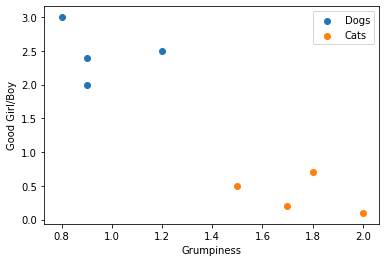

In [3]:
plt.scatter(dog_data['grumpiness'], dog_data['good girl/boy'], label='Dogs')
plt.scatter(cat_data['grumpiness'], cat_data['good girl/boy'], label='Cats')
plt.xlabel('Grumpiness')
plt.ylabel('Good Girl/Boy')
plt.legend()
plt.show()

In [4]:
def euclidean_dist(x, y):
    
    distance = np.sqrt(np.sum((x-y)**2))
    
    return distance

In [5]:
class Binary_NC_classifier(object):
    
    def __init__(self, dist_func):
        
        self.dist_fn = dist_func 
        self.mean_c0 = None
        self.mean_c1 = None
        
    def fit(self, X, y):
        
        self.X = X
        self.y = y
        self.class_0_idx = np.argwhere(self.y==0)[:,0]
        self.class_1_idx = np.argwhere(self.y==1)[:,0]
        
        self.mean_c0 = np.mean(self.X[self.class_0_idx], axis=0)
        self.mean_c1 = np.mean(self.X[self.class_1_idx], axis=0)
        
    def predict(self, x):
        
        min_dist_class = np.argmin([self.dist_fn(x, self.mean_c0), self.dist_fn(x, self.mean_c1)])
        
        self.X = np.vstack([self.X, x])
        self.y = np.concatenate([self.y, np.array([min_dist_class])])
        
        if min_dist_class == 0:
            self.class_0_idx = np.concatenate([self.class_0_idx, np.array([len(self.X)-1])])
            self.mean_c0 = np.mean(self.X[np.argwhere(self.y==0)[:,0]], axis=0)
        else:
            self.class_1_idx = np.concatenate([self.class_1_idx, np.array([len(self.X)-1])])
            self.mean_c1 = np.mean(self.X[np.argwhere(self.y==1)[:,0]], axis=0)
        
        return min_dist_class

In [6]:
model = Binary_NC_classifier(euclidean_dist)
model.fit(X, Y)

In [7]:
new_point = np.array([1.8, 0.5])

In [8]:
predicted_label = model.predict(new_point)
print(f'Predicted label: {labels[predicted_label]}')

Predicted label: dog


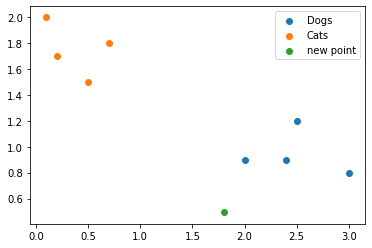

In [9]:
plt.scatter(dog_data['good girl/boy'], dog_data['grumpiness'], label='Dogs')
plt.scatter(cat_data['good girl/boy'], cat_data['grumpiness'], label='Cats')
plt.scatter(new_point[0], new_point[1], label='new point')
plt.legend()

# Q2: Binary breast cancer classification
Following up you'll find a UCI dataset containing samples of healthy patients, and patients that were diagnosed with breast cancer. 
For specific information about the dataset, please visit: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


Your goals are to complete the following tasks:

### 1. Parse the data and perform some cleaning:
- Split the labels(='diagnosis') from the rest of the dataset
- Drop the columns: 'id', 'Unnamed: 32':
    - Hint: Check out the pandas function 'drop': https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
- Convert the labels(=['M', 'B']) to binary ones(=1, 0)
    - Hint: You can use pd.get_dummies() or your method to do so
- split the dataset into training and test set(ratio=80%/20%). Create two new datasets, and keep the original, whole dataset fixed:
    - You may use: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    - Don't forget to shuffle the data

### 2. Do some exploration on the whole dataset(training and test set together):
- Plot histogram of radius mean values from both classes
    - Hint: Use np.hist() 
- Plot correlation matrix between between every pair of features
    - Hint: Use sns.heatmap(data.corr())
- Look for feature pairs that strongly correlate with each other, and save one of them. Repeat this process until you have found 5 features. Keep those and drop the rest.(remember to do this for both the training dataset and the test dataset) 
    
### 3. Use the sklearn package and train the following algorithms on the dataset:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- Apply the following linear models to the dataset:
    - Logisitc regression
    - SVM(linear kernel)
    
- Apply the following non-linear models to the dataset:
    - SVM(rbf kernel)
    - Random Forest
        
- NOTE: Test different hyperparameter settings for the corresponding models and pick the best one.
    
### 4. Compute the confusion matrix and print a classification report for each classifier, which one performs best and why would you say so ?
- Docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html, 
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
data = pd.read_csv('data/breast_cancer.csv')
data.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

# Q3: Multiclass sentiment Analysis a la Trump(Optional but quite funny)

![Binary classification](resources/trump.jpg)
Goal: Identify and categorize opinions from text data.
---
Following up you'll find a official dataset containing user tweets about the first 2016 GOP Presidential Debate, or as stated by the original source: 
```
We looked through tens of thousands of tweets about the early August GOP debate in Ohio and asked contributors to do both sentiment analysis and data categorization. Contributors were asked if the tweet was relevant, which candidate was mentioned, what subject was mentioned, and then what the sentiment was for a given tweet. We've removed the non-relevant messages from the uploaded dataset.
```
For more information about the data, please follow:
https://www.kaggle.com/crowdflower/first-gop-debate-twitter-sentiment


### Your goals are to complete the following tasks:
---

### 1. Parse the data and perform some exploration first, that is:
- Load and initially explore the dataset located under: 'data/sentiment.csv'
- remove all columns except 'text' and 'sentiment'
- split data into 2 separate datasets, where one contains just negative and one contains the positive tweets(create 2 new datasets instead of deleting the old one)
- remove stop words from tweets(see https://www.nltk.org/book/ch02.html 4.1), as well as hashtags, '@'-signs and 'RT'-sign'
- print a wordcloud for the positive-tweet dataset aswell as the negative tweets dataset. It displays the most appearing words in each dataset. The code for the wordcloud is provided below.
- create a list object, called 'tweets', that contains tuples: (list of words in tweet(cleaned), sentiment('Negative' or 'Positive'))

### 2. Split the data into training and test set(the ratio should be 80% / 20%)
    
    
### 3. Use the nltk library to train a NaiveBayesClassifier on the dataset:
- use nltk.classify.util.apply_features to provide the word features to the classifier(look up docu https://www.nltk.org/api/nltk.classify.html#module-nltk.classify.util)
the needed input argument feature_func input is provided by extract_features function.
- Use: 'classifier = nltk.NaiveBayesClassifier.train(training_set)' to train the classifier, where training_set is the output of the apply_features function

### 4. Use the trained classifier to predict the sentiments of the test set. Plot confusion matrix and print accuracy report like done above

### 5. Provide your own inputs to the classifier and see check whether it is able to classify your intended sentiment.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [ ]:
data = pd.read_csv('data/sentiment.csv')
data.head()

In [ ]:
data = data[['text','sentiment']]

In [ ]:
data.head()

In [ ]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.2)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

In [ ]:
train_pos = # TODO
train_neg = # TODO

test_pos = # TODO
test_neg = # TODO

def wordcloud(cleaned_words, color='black'):
    words = ' '.join(cleaned_words)
    cleaned_word = " ".join([word for word in words.split()])
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud(train_pos,'white')
print("Negative words")
wordcloud(train_neg)

In [ ]:
# Provided functions
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

w_features = get_word_features(get_words_in_tweets(tweets))

# IMPORTANT: USE THIS ONE FOR nltk.classify.apply_features argument input
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [ ]:
# INPUTS

neg_cnt = 0
pos_cnt = 0

for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
        
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (neg_cnt, len(test_neg)))        
print('[Positive]: %s/%s '  % (pos_cnt, len(test_pos)))   

# Q4. Implement cross validation(Optional)
![Binary classification](resources/crossvalidation.png)
### TODO:
Your first task will be to implement the cross-validation algorithm using a classification algorithm of your choice.
The pseudocode would look something like this:

```python
1. split dataset into training set ant test set
2. loop over a list of hyperparameter settings:
    2.1 split training set into training set and validation set
    2.2 initialize your classification algo. using those hyperparams
    2.3 train your algo. on the training set
    2.4 measure accuracy of your algo on the validation set
    2.5 safe temp. hyperparams if temp accuracy exceeded prior one
3. train the whole training set on the best hyperparameter setting
4. evaluate final accuracy of your algorithm using the test set
```